C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering Accuracy: 83.33%
Confusion Matrix:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


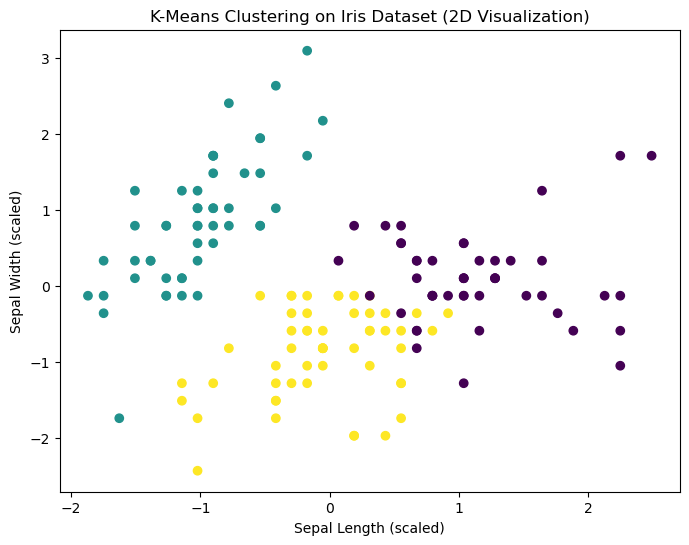

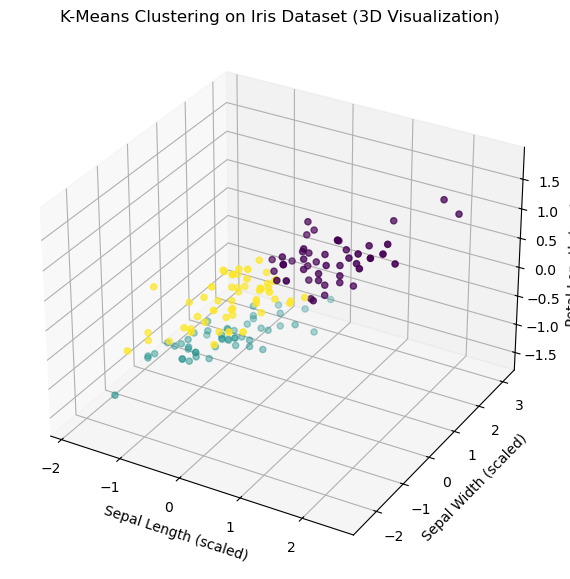

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters (since there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels assigned by K-Means
cluster_labels = kmeans.labels_

# Map cluster labels to actual species for comparison
# KMeans assigns cluster numbers arbitrarily, so we map them manually based on majority class
# Assume the cluster number most corresponds to the species label
def map_clusters_to_labels(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        # Find the most common true label for this cluster
        mask = cluster_labels == cluster
        most_common = np.bincount(true_labels[mask]).argmax()
        mapping[cluster] = most_common
    return np.array([mapping[label] for label in cluster_labels])

# Map clusters to actual labels
mapped_labels = map_clusters_to_labels(cluster_labels, y)

# Calculate accuracy of the clustering
accuracy = accuracy_score(y, mapped_labels)
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y, mapped_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize clusters in 2D (first two features)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title("K-Means Clustering on Iris Dataset (2D Visualization)")
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()

# Visualize clusters in 3D (using the first three features)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis', marker='o')
ax.set_title("K-Means Clustering on Iris Dataset (3D Visualization)")
ax.set_xlabel('Sepal Length (scaled)')
ax.set_ylabel('Sepal Width (scaled)')
ax.set_zlabel('Petal Length (scaled)')
plt.show()
